In [2]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [3]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 116kB/s 
     |████████████████████████████████| 450kB 42.2MB/s 
     |████████████████████████████████| 3.8MB 43.7MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.0.0'

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [0]:
train_images_flat = train_images.reshape([60000,784,-1])

In [19]:
train_images_flat.shape

(60000, 784, 1)

In [0]:
import matplotlib.pyplot as plt

In [0]:
def draw_sample(img):
  plt.imshow(img)
  plt.show()

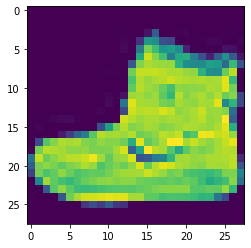

In [28]:
draw_sample(train_images[0])